# Part 1. PyTorch introductory assignments

PyTorch exercises for those who want to remember the basics of framefork.

In [1]:
# main framework
import torch
# additional functions on tensors or networks
from torch.nn import functional as F

# work with arrays in pure python
import numpy as np

## 1.1 Tensors creation
Tensors is a data structure optimized for automatic differentiation. In most cases, working with them is similar to working with arrays in numpy.

We use `torch.tensor()` to create tensor object from pure Python and Numpy objects.

### 1. From list

In [2]:
data_lst = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
''' YOUR CODE HERE '''
tensor_from_lst = torch.tensor(data_lst)
#tensor_from_lst = None
print(tensor_from_lst)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
assert(tensor_from_lst.dtype == torch.int64)
assert(tensor_from_lst.shape == torch.Size([3, 3]))

In [4]:
print(tensor_from_lst.dtype)
print(tensor_from_lst.shape)
print(tensor_from_lst.device)

torch.int64
torch.Size([3, 3])
cpu


### 2. From Numpy array



In [5]:
data_ndarray = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
tensor_from_numpy = torch.tensor(data_ndarray)
print(tensor_from_numpy)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [6]:
assert(tensor_from_numpy.dtype == torch.int64)
assert(tensor_from_numpy.shape == torch.Size([3, 3]))

You can also try to use `torch.from_numpy()` on the following array to understand the differences between this function and `torch.tensor()`

In [7]:
data_ndarray2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
tensor_using_from_numpy = torch.from_numpy(data_ndarray)
print(tensor_using_from_numpy)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [8]:
tensor_from_numpy *= 0
tensor_using_from_numpy *= 0

In [9]:
print(tensor_using_from_numpy)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [10]:
assert(all(data_ndarray[0] == [1, 2, 3]))
assert(all(data_ndarray2[0] == [0, 0, 0]))

AssertionError: ignored

In [ ]:
print(tensor_from_numpy)

In [ ]:
print(tensor_using_from_numpy)

### 3. Using default values

In [ ]:
data_shape = (2, 3, 4)

# Creating a tensor of a given shape filled with zeros
tensor_zeros = torch.zeros(data_shape)
print('Zero:\n{}'.format(tensor_zeros))

In [ ]:
# Create tensor of a given shape filled with ones
tensor_ones = torch.ones(data_shape)
print('Ones:\n{}'.format(tensor_ones))

# Create tensor of a given shape filled with random numbers
tensor_rand = torch.rand(data_shape)
print('Random: \n{}'.format(tensor_rand))

In [ ]:
assert(all(tensor_ones[0][0] == torch.tensor([1., 1., 1., 1.])))
assert(tensor_ones.shape == torch.Size(data_shape))
assert(tensor_rand.shape == torch.Size(data_shape))

You can also create tensor from sequence using `torch.arange()` and then use `tensor.reshape()` function to convert data into the desired shape.

In [ ]:
range_len = 24
# Create tensor filled with sequential values from 0 to range_len
tensor_seq = torch.arange(0, range_len)
print('Sequence:\n{}'.format(tensor_seq))
print(tensor_seq.shape)

# Convert the shape of the created tensor to fit data_shape
tensor_seq_reshaped = tensor_seq.reshape(data_shape)
print('Reshape:\n')
print(tensor_seq_reshaped)
print(tensor_seq_reshaped.shape)

In [ ]:
assert(tensor_seq[0] == torch.tensor(0))
assert(tensor_seq[-1] == torch.tensor(range_len - 1))
assert(tensor_seq.shape ==torch.Size([range_len]))

In [ ]:
assert(tensor_seq_reshaped[0][0][0] == torch.tensor(0))
assert(tensor_seq_reshaped[-1][-1][-1] == torch.tensor(range_len - 1))
assert(tensor_seq_reshaped.shape == torch.Size(data_shape))

If you want to make a tensor with a shape of another tensor, but with default values, you can use `torch.values_like()` functions

In [ ]:
tensor = torch.rand((1, 2, 2))

# For example, you want to create a mask for the image or something filled with zeros
tensor_mask = torch.zeros_like(tensor)
print('Image:\n{}'.format(tensor))
print('Image_mask:\n{}'.format(tensor_mask))

Using similar functions, create a tensor mask filled with ones and a mask filled with the random values

In [ ]:
# Mask, filled with ones (with a shape of tensor)
tensor_mask_ones = torch.ones_like(tensor)
print('ones_like\n')
print("Image:\n{}".format(tensor))
print('Image_mask:\n{}'.format(tensor_mask_ones))

# Mask, filled with random values (with a shape of tensor)
tensor_mask_rand = torch.rand_like(tensor)
print('\nrand_like\n')
print("Image:\n{}".format(tensor))
print('Image_mask:\n{}'.format(tensor_mask_rand))

In [ ]:
assert(tensor_mask_ones[0][0][0] == torch.tensor(1.))
assert(tensor_mask_ones.shape == tensor.shape)
assert(tensor_mask_rand.shape == tensor.shape)

## 1.2 Devices

Tensors can be stored in general memory, GPU memory, TPU memory.

In [ ]:
tensor = torch.rand((2, 5, 5))
print(tensor.device)

For the further assignments you should use Google Colab with GPU (Runtime -> Change Runtime Type -> Hardware Accelerating) and store tensors in GPU memory.

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Move tensor to the GPU memory
tensor = torch.rand((2, 5, 5))
print(tensor.to('cuda:0').device)

In [ ]:
try:
    tensor.to('cuda:0').numpy()
except Exception as e:
    print(e)

In [ ]:
assert(tensor.device.type == 'cuda')

## 1.3 Autograd

Auto differentiation is a core of ML frameworks. PyTorch can figure out the computation of gradients for a set of operations. Almost all pytorch operations are differentiable.

`required_grad=True` make PyTorch to store gradients for this particular tensor. Usually, for input values this parameters is set to False - we don't want to change our real data.

In [ ]:
# tensor = torch.rand((2, 4, 4), requires_grad=True)
tensor = torch.ones((2, 4, 4))
tensor.requires_grad = True

In [ ]:
# define function y
y = 5 * tensor ** 3 - 3
print(y)

In [ ]:
print(tensor.grad)

There is no gradient for our tensor, because we have to call `.backward() ` method of variable $y$. This method will calculate gradien of $y$ over variable tensor

NOTE: gradient can be calculated only for a scalar. The output of $y$ is a tensor, we can calculate mean(), sum(), etc

In [ ]:
# Call the backward method and calculate gradient for the sum of the y variable
y = 5 * tensor ** 3 - 3
y.sum().backward()
print(tensor.grad)

In [ ]:
y = 5 * tensor ** 3 - 3
y.mean().backward()
print(tensor.grad)

In [ ]:
assert(tensor.grad.shape == torch.Size([2, 4, 4]))
assert(tensor.grad[0][0][0] == torch.tensor(15))

**NOTE:** 
* you can not run `.backward()` again without calculating y value again;
* if you run y function one more time the gradient values for tensor variable will be summed.

In [ ]:
# Call the backward method again and calculate gradient for the sum of the y variable
y = 5 * tensor ** 3 - 3
y.sum().backward()
print(tensor.grad)

In [ ]:
assert(tensor.grad.shape == torch.Size([2, 4, 4]))
assert(tensor.grad[0][0][0] == torch.tensor(30))

## 1.4 Neural network in PyTorch

NN in PyTorch defines as a set of different layers. Each layer is a specific function:


*   Linear layer, convolutional layer, etc
*   Activation function
*   Tensors operations

The first type has parameters called weights and biases.The process of NN training is to change weights of NN layers so the prediction of network will match the real object.


## Linear layer

[torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) takes a matrix $(N, *, H_{in})$ and produce a matrix $(N, *, H_{out})$, where

$*$ means any number of additional dimensions, $H_{in}$ - input features, $H_{out}$ - output features

Linear layer is a $W \cdot x + b$ operation, where $W$ - weights of the layer and $b$ - bias. Bias can be ommited with `bias=False`

In [ ]:
input_tensor = torch.ones((3, 5))
print('input shape: ', input_tensor.shape)

We fed sample of data with batch_size=3 and features of each sample=5. 

All samples in a batch processed separately. This is true for all layers and functions of PyTorch.

In [ ]:
# Create a linear layer for given data with the number of out_features=100 and ommited bias (don't forget about GPU)
layer = torch.nn.Linear(in_features=5, out_features=100, bias=False, device='cuda:0')
layer

Let's take a look at layers parameters. 

`layer.paramaters()` outputs a generator of all weights and biases of this object.

In [ ]:
print(type(layer.parameters()))
# iterate over layer parameters and print shapes
for i in layer.parameters():
    print(i.shape)

You should receive the following output:

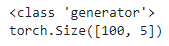

Single layer contains only one weight matrix of shape (H_out, H_in). You can access the weights of a layer directly, using `layer.weight` method

In [ ]:
print(layer.weight.shape)

You can move layer from CPU to GPU in the same way as tensor.

In [ ]:
layer.to('cpu') # or layer.cpu() for simplicity

In [ ]:
layer.to('cuda:0')

### Neural Network

You can write a NN as a set of layers and then apply them sequentially

In [ ]:
input_tensor = torch.rand((3, 5))

# Create three sequential linear layers for the given input tensor. First two with the output 100 and the last one with the output 3.
# Apply them sequentially and store in the output
layer_1 = torch.nn.Linear(5, 100)
layer_2 = torch.nn.Linear(100, 100)
layer_3 = torch.nn.Linear(100, 3)

#layer_1.to('cuda:0')
#layer_2.to('cuda:0')
#layer_3.to('cuda:0')
# approx 3 lines of code here

output = layer_3(layer_2(layer_1(input_tensor)))
print(output)

In [ ]:
assert(output.shape == torch.Size([3, 3]))

### Activation and loss functions

You can use different activation functions from `torch.nn` and combine them sequentially with the NN layers

In [ ]:
# Example of the activation function
torch.nn.ReLU6()

You can use different loss functions from `torch.nn`

In [ ]:
# Example of the loss fun
loss_function = torch.nn.CrossEntropyLoss()

# Part 2. Feedforward Neural Network construction assignment 

Import all the necessary libraries

In [1]:
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np

import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

device = ('cuda' if torch.cuda.is_available() else 'cpu')

To use the `plot_decision_regions` we should additionally install the `mlxtend` package

In [2]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Uploading dataset

Let's upload the wine dataset from sklearn

In [20]:
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

Create class for the dataset. Inherit a class from Dataset

In [21]:
# Fill the WineDataset class fields
class WineDataset():
    def __init__(self, X, y):
        ''' YOUR CODE HERE '''
        self.X = torch.tensor(X, dtype=torch.float32).to(device)
        self.y = torch.tensor(y, dtype=torch.float32).to(device)
        self.len = X.shape[0]
    
    def __len__(self):
        ''' YOUR CODE HERE '''
        return self.len
    
    def __getitem__(self, idx):
        ''' YOUR CODE HERE '''
        return self.X[idx], self.y[idx]

Create train and test splits using `train_test_split` function with the following parameters:

* size of test - 30%
* using shuffle
* using SEED constant for the random state

Remember that use should use WineDataset class.

In [26]:
''' YOUR CODE HERE '''
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                    wine.target,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=SEED)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# #X_test = X_test.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

train_dataset = WineDataset(X_train, y_train)
test_dataset = WineDataset(X_test, y_test)

(54, 1)
(124, 1)
(54, 13)
(124, 13)


In [27]:
assert(len(train_dataset) == 124)
assert(len(test_dataset) == 54)

## Creating Feedforward network

Create the FNN with the following attributes:
* 3 linear layers
* activation functions on your choice (the most suitable for this kind of task)

In [28]:
''' YOUR CODE HERE '''
INPUT_SIZE = 13
OUTPUT_SIZE = 3
n_hidden_neurons = 200

class WineNet(nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        
        ''' YOUR CODE HERE '''
        self.layer1 = torch.nn.Linear(INPUT_SIZE, n_hidden_neurons, bias=True, dtype=torch.float)
        self.layer2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True, dtype=torch.float)
        self.layer3 = torch.nn.Linear(n_hidden_neurons, OUTPUT_SIZE, bias=True, dtype=torch.float)

        self.activation = torch.nn.ReLU6()
        self.activation_last = torch.nn.Softmax(1)
    def forward(self, x):
        ''' YOUR CODE HERE '''
        x1 = self.activation(self.layer1(x))
        x2 = self.activation(self.layer2(x1))
        x = self.activation_last(self.layer3(x2))
        #x = self.layer1(x)
        #x = self.layer2(x)
        #x = self.activation(x)
        #x = torch.nn.ReLU6((self.layer1))
        #x = self.activation((self.layer2(x)))


        # very funny, idk what I'm doing
        #x = torch.reshape(x, (x.shape[0], x.shape[1] * x.shape[2] * x.shape[3]))
        #x = self.layer3(x)
        return x

    # для использования в функции plot_decision_regions
    def predict(self, x):
        ''' PLEASE DO NOT CHANGE THE CODE OF THIS FUNCTION '''
        x = torch.tensor(x, dtype=torch.float32).to(device)
        with torch.no_grad():
            x = self.forward(x)
        x = x.cpu().argmax(dim=-1)
        x = x.data.numpy()
        return x

In [29]:
model = WineNet(200) # you can change parameters here
model = model.to(device)

## Training FNN

In [34]:
# Initialize the loss function and initialize and tune the optimizer and scheduler  
''' YOUR CODE HERE '''
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
#scheduler = None

In [31]:
print(x.shape)

torch.Size([4, 13])


Write the code for the model training process.

NOTE: You can memorize the best metric value and weight in the colab with the commands 

`torch.save(model.state_dict(), STATE_DICT_PATH)`, and `load model.load_state_dict(torch.load(STATE_DICT_PATH))`

In [40]:
''' YOUR CODE HERE '''
BATCH_SIZE = 100
EPOCHS_NUM = 10000

''' PLEASE DO NOT CHANGE THE CODE OF THESE LINES '''
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)

# choose any metric from sklearn for multiclass classification
''' YOUR CODE HERE '''
metric_fn = sklearn.metrics.accuracy_score

best_metric = sklearn.metrics.f1_score
#best_metric = sklearn.metrics.f1_score
STATE_DICT_PATH = 'best_model_state_dict.pt'

for epoch in tqdm(range(EPOCHS_NUM)):
    model.train()
    for x, y in train_loader:
        ''' YOUR CODE HERE '''
        pred = model(x)

        loss = loss_fn(pred, y.flatten().long())
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if scheduler:
          scheduler.step(loss)
        # Several lines

    if scheduler is not None:
        scheduler.step()
        
    if epoch % 100 == 0:
        model.eval()
        test_preds = []
        true = []
        # with the no_grad() option, the gradients of the weights do not count
        with torch.no_grad():
            for x, y in test_loader:
                ''' YOUR CODE HERE '''
                preds = model(x)
                test_preds.append(preds)
                true.append(y.flatten().long())
        
        test_preds = torch.cat(test_preds).squeeze()
        true = torch.cat(true).squeeze()
        test_loss = loss_fn(test_preds, true).item()
        train_loss = loss_fn(preds, y.flatten().long())
        #test_metric = metric_fn(true, test_preds.argmax(dim=-1))
        test_metric = metrics.f1_score(true, test_preds.argmax(dim=-1), average='macro')
        
        ''' YOUR CODE HERE '''
        # Only if you want to save the best state

        print(f'Test loss: {test_loss:0.4f}\t\tTrain loss: {train_loss:0.4f} \t\tTest metric: {test_metric:0.4f}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Test loss: 0.8685		Train loss: 0.8685 		Test metric: 0.5297


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8568		Train loss: 0.8568 		Test metric: 0.5297


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8526		Train loss: 0.8526 		Test metric: 0.5307


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8495		Train loss: 0.8495 		Test metric: 0.5307


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8501		Train loss: 0.8501 		Test metric: 0.5827


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8412		Train loss: 0.8412 		Test metric: 0.6233


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8397		Train loss: 0.8397 		Test metric: 0.6340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8354		Train loss: 0.8354 		Test metric: 0.6474


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8434		Train loss: 0.8434 		Test metric: 0.6030


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8301		Train loss: 0.8301 		Test metric: 0.7517


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8274		Train loss: 0.8274 		Test metric: 0.7425


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.8179		Train loss: 0.8179 		Test metric: 0.7612


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7938		Train loss: 0.7938 		Test metric: 0.7569


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7356		Train loss: 0.7356 		Test metric: 0.8467


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7039		Train loss: 0.7039 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7003		Train loss: 0.7003 		Test metric: 0.9240


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7345		Train loss: 0.7345 		Test metric: 0.8655


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6945		Train loss: 0.6945 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6950		Train loss: 0.6950 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6927		Train loss: 0.6927 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6933		Train loss: 0.6933 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6964		Train loss: 0.6964 		Test metric: 0.9284


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7041		Train loss: 0.7041 		Test metric: 0.9026


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6924		Train loss: 0.6924 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6952		Train loss: 0.6952 		Test metric: 0.9081


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6918		Train loss: 0.6918 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7033		Train loss: 0.7033 		Test metric: 0.9284


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6894		Train loss: 0.6894 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7068		Train loss: 0.7068 		Test metric: 0.9207


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6927		Train loss: 0.6927 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6943		Train loss: 0.6943 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6913		Train loss: 0.6913 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6935		Train loss: 0.6935 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7062		Train loss: 0.7062 		Test metric: 0.9026


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6910		Train loss: 0.6910 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7030		Train loss: 0.7030 		Test metric: 0.8533


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6894		Train loss: 0.6894 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6903		Train loss: 0.6903 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6948		Train loss: 0.6948 		Test metric: 0.8957


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7007		Train loss: 0.7007 		Test metric: 0.9284


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7197		Train loss: 0.7197 		Test metric: 0.8848


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7066		Train loss: 0.7066 		Test metric: 0.9207


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6898		Train loss: 0.6898 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6938		Train loss: 0.6938 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6878		Train loss: 0.6878 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6981		Train loss: 0.6981 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6951		Train loss: 0.6951 		Test metric: 0.9284


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6962		Train loss: 0.6962 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6985		Train loss: 0.6985 		Test metric: 0.9284


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6936		Train loss: 0.6936 		Test metric: 0.9169


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6922		Train loss: 0.6922 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6942		Train loss: 0.6942 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7051		Train loss: 0.7051 		Test metric: 0.8962


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6928		Train loss: 0.6928 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6928		Train loss: 0.6928 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6879		Train loss: 0.6879 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7079		Train loss: 0.7079 		Test metric: 0.9155


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6931		Train loss: 0.6931 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6892		Train loss: 0.6892 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6900		Train loss: 0.6900 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7025		Train loss: 0.7025 		Test metric: 0.9330


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7013		Train loss: 0.7013 		Test metric: 0.9207


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6894		Train loss: 0.6894 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6941		Train loss: 0.6941 		Test metric: 0.9330


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6891		Train loss: 0.6891 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6977		Train loss: 0.6977 		Test metric: 0.9169


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6893		Train loss: 0.6893 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6964		Train loss: 0.6964 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6896		Train loss: 0.6896 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6914		Train loss: 0.6914 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6893		Train loss: 0.6893 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6889		Train loss: 0.6889 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6867		Train loss: 0.6867 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6938		Train loss: 0.6938 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6975		Train loss: 0.6975 		Test metric: 0.9155


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6878		Train loss: 0.6878 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6871		Train loss: 0.6871 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6924		Train loss: 0.6924 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6867		Train loss: 0.6867 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6867		Train loss: 0.6867 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6870		Train loss: 0.6870 		Test metric: 0.9126


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6870		Train loss: 0.6870 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7000		Train loss: 0.7000 		Test metric: 0.9155


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6921		Train loss: 0.6921 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6935		Train loss: 0.6935 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6878		Train loss: 0.6878 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6876		Train loss: 0.6876 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6886		Train loss: 0.6886 		Test metric: 0.9508


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6937		Train loss: 0.6937 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6963		Train loss: 0.6963 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7165		Train loss: 0.7165 		Test metric: 0.8838


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7092		Train loss: 0.7092 		Test metric: 0.9155


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7019		Train loss: 0.7019 		Test metric: 0.9207


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7027		Train loss: 0.7027 		Test metric: 0.9041


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6862		Train loss: 0.6862 		Test metric: 0.9294


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6960		Train loss: 0.6960 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.7012		Train loss: 0.7012 		Test metric: 0.9207


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6893		Train loss: 0.6893 		Test metric: 0.9340


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6917		Train loss: 0.6917 		Test metric: 0.9169


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Test loss: 0.6996		Train loss: 0.6996 		Test metric: 0.9155


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Mounted at /content/gdrive


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<All keys matched successfully>


Example of the nice data plot :)

RuntimeError: ignored

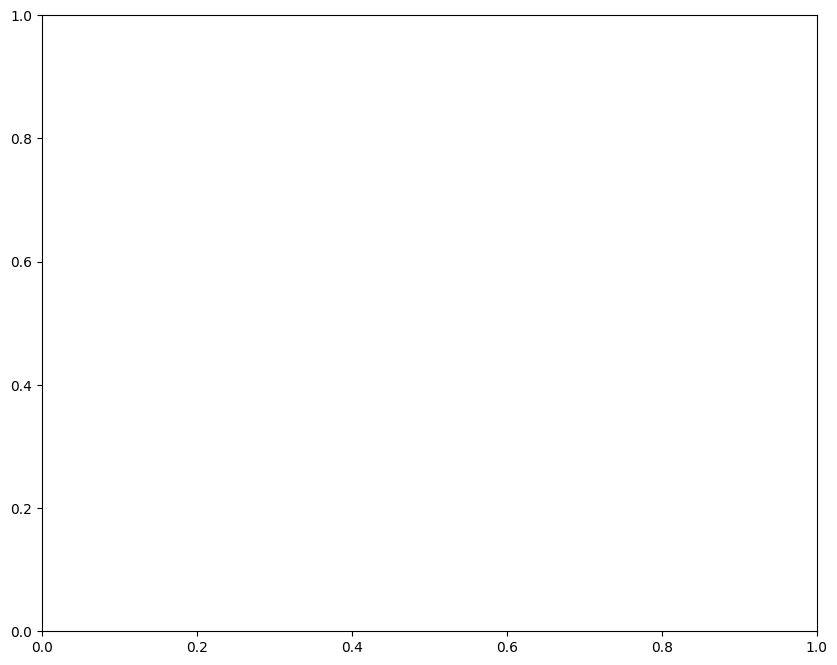

In [42]:
# display decision region for all elements

model.eval()
plt.rcParams['figure.figsize'] = (10, 8)

X = wine.data[:, :2] # fix here if needed 
y = wine.target

plot_decision_regions(X, y, clf=model, legend=2)

### Model evaluation

You should create a model with the F1-score greater than 0.87

In [41]:
model.eval()
test_preds = []
true = []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        preds = model.forward(x).cpu()
        test_preds.append(preds)
        true.append(y)
test_preds = torch.cat(test_preds).squeeze()
true = torch.cat(true).squeeze()
test_metric = metrics.f1_score(true, test_preds.argmax(dim=-1), average='macro')

print('F1-score on test:', test_metric)
assert test_metric >= 0.87, "You need to get f1_score greater or equal to 0.87"

F1-score on test: 0.9339774557165862
